# BI-PRS Semestral project 2 

## Task parameter

Group representative - Rafael Galiev 16.04.2003

In [1]:
K = 16
L = 6

In [2]:
M = ((K+L)*47) %% 11 + 1
M

[1] 1

So our dataset is case1002 - Spotřeba energie živočichů při letu

## Dataset

In [3]:
# import required libraries
library(ggplot2)
library(Sleuth2)
library(vtable)
library(cowplot)
library(olsrr)

Loading required package: kableExtra


Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers




In [4]:
# assign dataset to our variable
df <- case1002

In [5]:
head(df)

,Species,Mass,Type,Energy
,<chr>,<dbl>,<fct>,<dbl>
1,Pteropus gouldii,779.0,non-echolocating bats,43.70
2,Pteropus poliocephalus,628.0,non-echolocating bats,34.80
3,Hypsignathus monstrosus,258.0,non-echolocating bats,23.30
4,Eidolon helvum,315.0,non-echolocating bats,22.40
5,Meliphaga virescens,24.3,non-echolocating birds,2.46
6,Melipsittacus undulatus,35.0,non-echolocating birds,3.93


## Task1 - Basic statistical investigations

In [6]:
colSums(is.na(df))

Species    Mass    Type  Energy 
      0       0       0       0

- No NA values!

In [7]:
dim(df) # Dataframe size
str(df) # Dataframe structure and data types

[1] 20  4

'data.frame':	20 obs. of  4 variables:
 $ Species: chr  "Pteropus gouldii" "Pteropus poliocephalus" "Hypsignathus monstrosus" "Eidolon helvum" ...
 $ Mass   : num  779 628 258 315 24.3 ...
 $ Type   : Factor w/ 3 levels "non-echolocating bats",..: 1 1 1 1 2 2 2 2 2 2 ...
 $ Energy : num  43.7 34.8 23.3 22.4 2.46 ...


- A data frame contains 20 observations on the following 4 variables.
1. Species - species of flying animals, contains strings - chr type.
2. Mass - mass (in grams), type num.
3. Type - factor type with 3 levels indicating the type of flying vertebrate
4. $Energy$ - in–flight energy expenditure (in W), type num. The explained variable.

Source: https://cran.r-project.org/web/packages/Sleuth2/Sleuth2.pdf

In [8]:
summary(df)

   Species               Mass                            Type   
 Length:20          Min.   :  6.70   non-echolocating bats : 4  
 Class :character   1st Qu.: 63.35   non-echolocating birds:12  
 Mode  :character   Median :266.50   echolocating bats     : 4  
                    Mean   :262.68                              
                    3rd Qu.:391.00                              
                    Max.   :779.00                              
     Energy      
 Min.   : 1.020  
 1st Qu.: 7.605  
 Median :22.600  
 Mean   :19.518  
 3rd Qu.:28.225  
 Max.   :43.700  

- The summary analysis shows the basic statistical characteristics for the variables, for numeric attributes these are mean, median, quartiles, minimum and maximum values. We can also see that we have 20 different animal species and their quantitative division into three types.
- However, this information includes all types. Let's look at each type separately.

In [9]:
# sumtable from vtable
# taken from 2. cviceni notebook
# ---------------------------------------------------------------------------
summ <- c('notNA(x)', 'mean(x)', 'sd(x)', 'min(x)', 'pctile(x)[25]',
          'median(x)', 'pctile(x)[75]', 'max(x)', 'IQR(x)')
# ---------------------------------------------------------------------------
sumtable(df, out="return", summ=summ, group="Type", group.long=T)

Warning message in sumtable(df, out = "return", summ = summ, group = "Type", group.long = T):
“Factor variables ignore custom summ options. Cols 1 and 2 are count and percentage.
Beware combining factors with a custom summ unless factor.numeric = TRUE.”


Variable,NotNA,Mean,Sd,Min,Pctile[25],Median,Pctile[75],Max,IQR
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Type: non-echolocating bats,,,,,,,,,
Mass,4,495,250,258,301,472,666,779,365
Energy,4,31,10,22,23,29,37,44,14
,,,,,,,,,
Type: non-echolocating birds,,,,,,,,,
Mass,12,263,165,24,108,302,391,480,283
Energy,12,21,13,2.5,13,24,28,44,16
,,,,,,,,,
Type: echolocating bats,,,,,,,,,


- The summary table presents statistical measures for mass and energy, separated by type of flying animal. It includes the mean, standard deviation, minimum and maximum values, quartiles and interquartile range. It can already be seen that the data show that no echolocating bats on average have greater mass and energy expenditure compared to birds and echolocating bats.

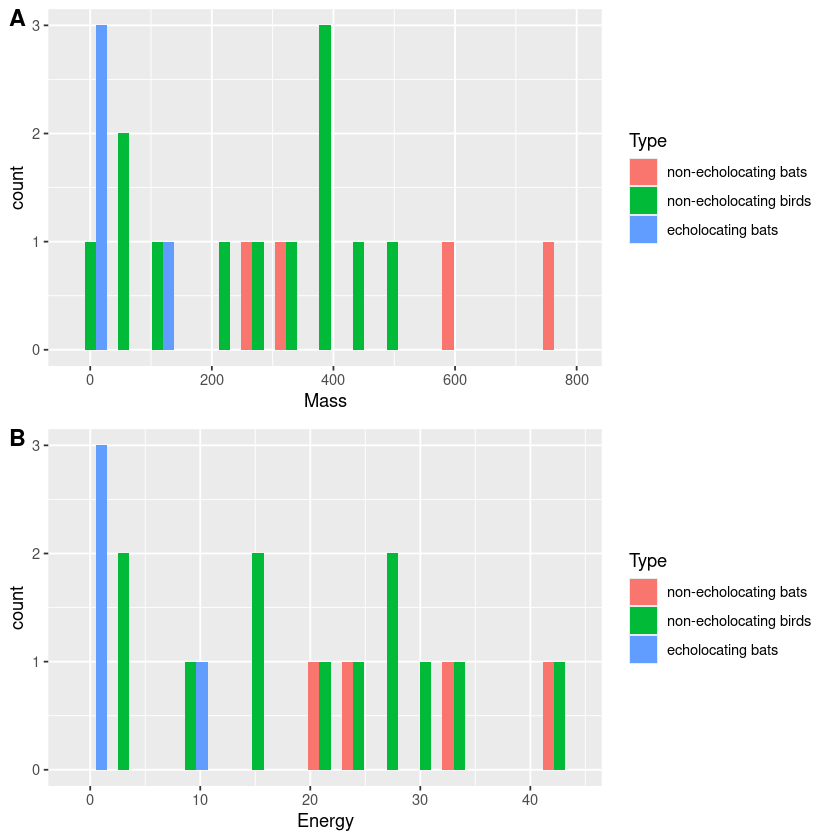

In [10]:
p_mass <- ggplot(df, aes(x=Mass, fill=Type)) +
          geom_histogram(position="dodge", bins=15)

p_energy <- ggplot(df, aes(x=Energy, fill=Type)) +
            geom_histogram(position="dodge", bins=15)

combined_plot <- plot_grid(p_mass, p_energy, nrow=2, labels="AUTO", rel_widths = c(3, .4))
print(combined_plot)

- Histograms of mass and energy distributions illustrate the different ranges and frequencies of observations for each of the flying animal types.

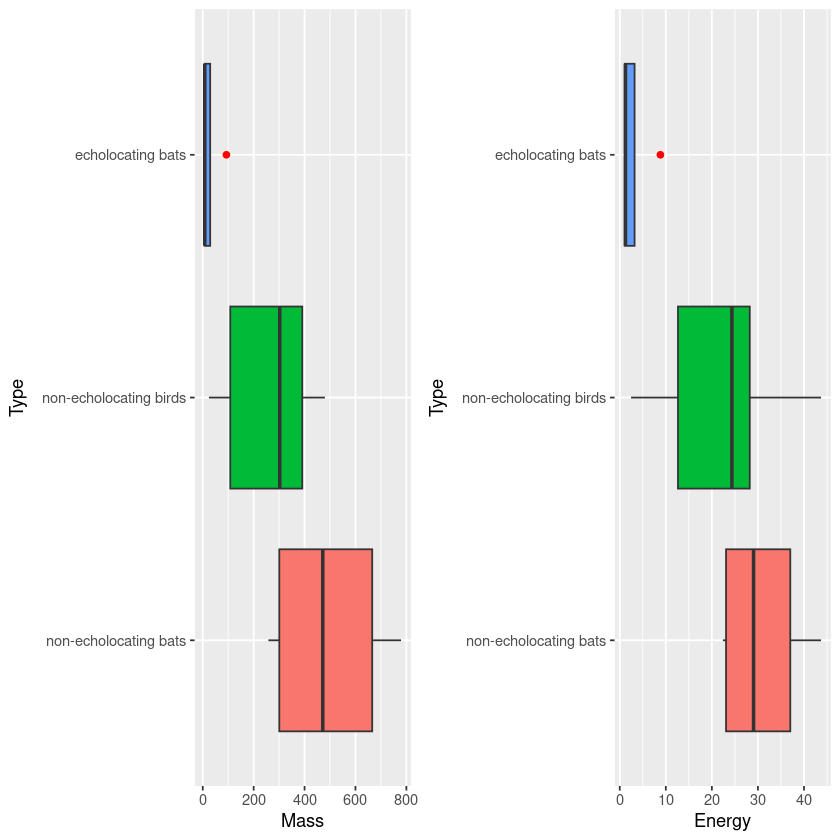

In [11]:
p1 <- ggplot(df, aes(x=Mass, y=Type, fill=Type)) +
        geom_boxplot(outlier.color="red", show.legend=F)
p2 <- ggplot(df, aes(x=Energy, y=Type, fill=Type)) +
        geom_boxplot(outlier.color="red", show.legend=F)
plot_grid(p1, p2, nrow=1)

 - Boxplots demonstrate that species with greater mass tend to have greater energy expenditure, which may indicate a positive correlation between these two variables. It can also be seen that non echolocating birds and bats have greater variation in mass and energy than echolocating bats, as confirmed by the data in the sumtable above.

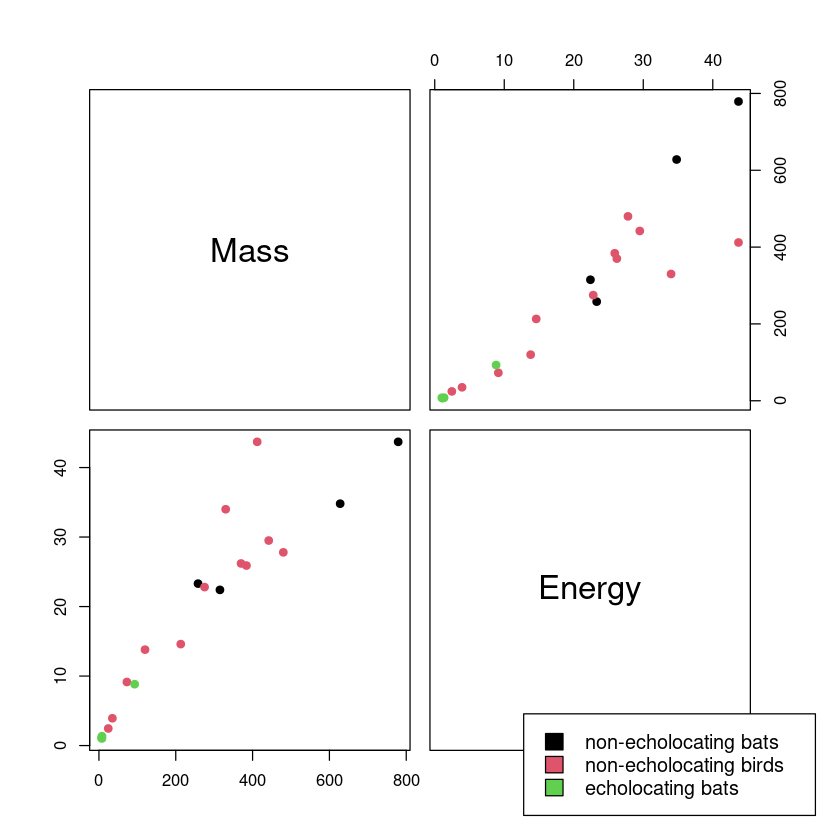

In [12]:
pairs(df[,c(2, 4)], col=df$Type, pch=19)
par(xpd = TRUE)
legend("bottomright", bty="o", y.intersp=.7, fill = unique(df$Type),
       legend = c(levels(df$Type)))

- The scatter plot for mass and energy again shows a positive correlation between these variables, suggesting that species with greater mass tend to have higher energy expenditure.

## Task 2

-  We will investigate the dependence of the explained variabl Energy on Mass.

- Firstly we will try to insert a different models into the data in the image and see which fits the data better.

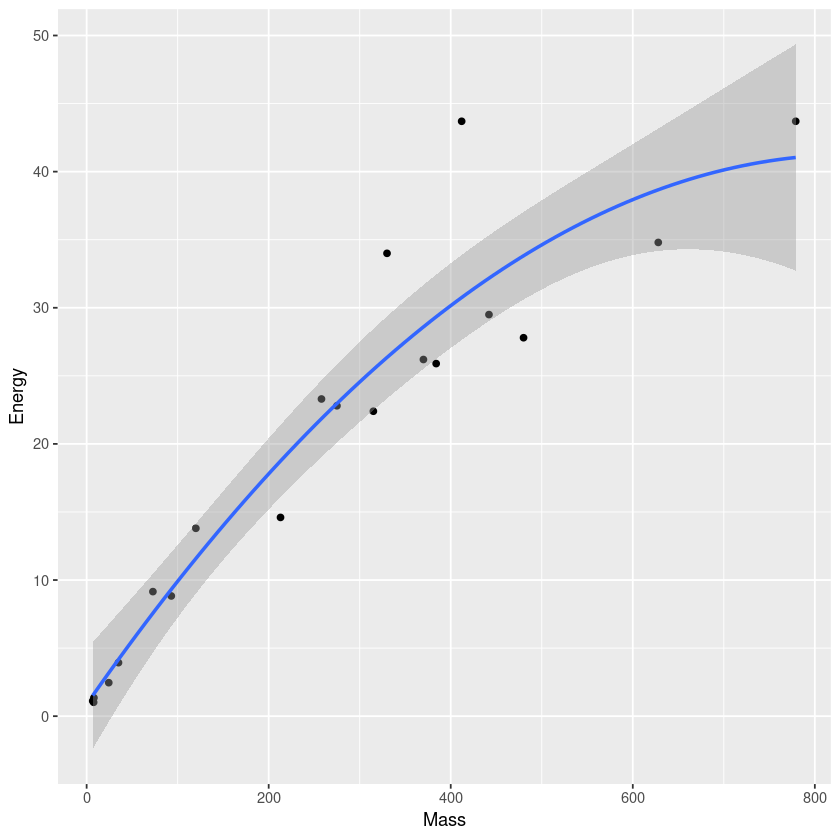

In [13]:
# try quadratic regression
ggplot(df, aes(x=Mass, y=Energy)) +
    geom_point() +
    stat_smooth(method="lm", formula=y~x+I(x^2))

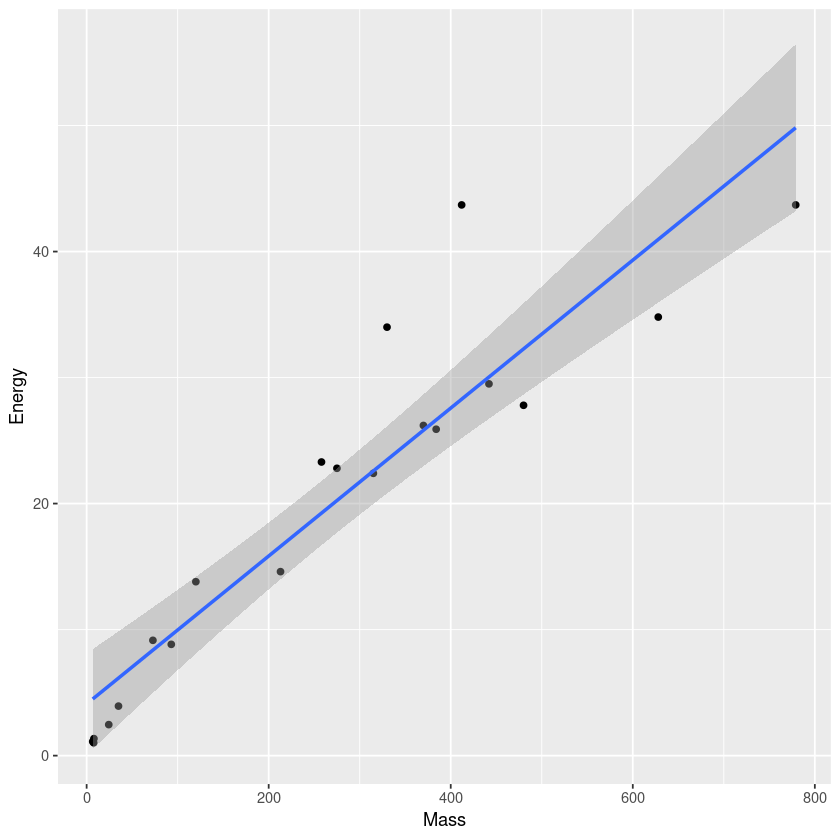

In [14]:
# try linear regression
ggplot(df, aes(x=Mass, y=Energy)) +
    geom_point() +
    stat_smooth(method="lm", formula=y~x)

- From the graphs it is not clear which model will be better, it requires additional tests, but according to the assignment we need to use one. Therefore, based on visual impression (we think the quadratic model better describes the data at low values) we will continue with the quadratic model. Besides, it is more logical that in life it is unlikely that energy expenditure increases at the same rate with increasing mass.

In [15]:
fit <- lm(Energy ~ Mass + I(Mass^2), data=df)
tmp <- predict(fit, interval="prediction")
df <- cbind(df, tmp)

Warning message in predict.lm(fit, interval = "prediction"):
“predictions on current data refer to _future_ responses
”


In [16]:
summary(fit)


Call:
lm(formula = Energy ~ Mass + I(Mass^2), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0208 -2.7700 -0.4419  1.4795 12.9464 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.8774690  1.9231123   0.456  0.65397    
Mass         0.0960417  0.0133419   7.198 1.49e-06 ***
I(Mass^2)   -0.0000571  0.0000191  -2.990  0.00823 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.515 on 17 degrees of freedom
Multiple R-squared:  0.9069,	Adjusted R-squared:  0.896 
F-statistic: 82.81 on 2 and 17 DF,  p-value: 1.721e-09


Coefficients interpretation:
- Intercept (Intersection with the Y axis): The value is approximately 0.877. This means that when the mass value is 0, the expected energy will be 0.877. However, it is important to note that if mass cannot take the value 0 in the context of the study (e.g., if mass cannot be negative or equal to zero), then the interpretation of the intersection with the Y-axis may not be meaningful. The P-value for the intercept is around 0.65397, which tells us that the intercept is not statistically significant at the generally accepted level of significance (0.05). Thus, although the model predicts an energy value of 0.877 at zero mass, this prediction is not supported by statistical significance.

- Linear coefficient (Mass): The value is approximately 0.096. This indicates that when mass increases by one unit, energy, on average, increases by 0.096 units, assuming other variables remain constant.

- Quadratic coefficient (Mass^2): The value is approximately -0.000057. This coefficient shows the change in the effect of mass on energy when the mass itself changes. That is, as mass increases, the effect of mass on energy decreases. In the context of this model, this indicates that as mass increases, the energy gain decreases, implying that energy growth slows as mass increases.

- In this case, the coefficients for mass and mass squared are statistically significant (p < 0.05), indicating that we reject the null hypothesis that the coefficients are equal to zero.


 - Multiple R-squared: A value of 0.9069 means that approximately 90.69% of the variation in the dependent variable (in this case energy) can be explained by the independent variables in the model (mass and mass squared). This is quite high and indicates that the model explains the data quite well.
  - Adjusted R-squared: A value of 0.896 accounts for the number of predictors in the model and the sample size by adjusting the R² for the possibility of a random fit of the data to the model. The adjusted R² is always slightly smaller than the multiple R² and is considered a more conservative estimate. A value of 0.896 indicates that after correcting for the number of predictors, the model still explains about 89.6% of the variation in energy.

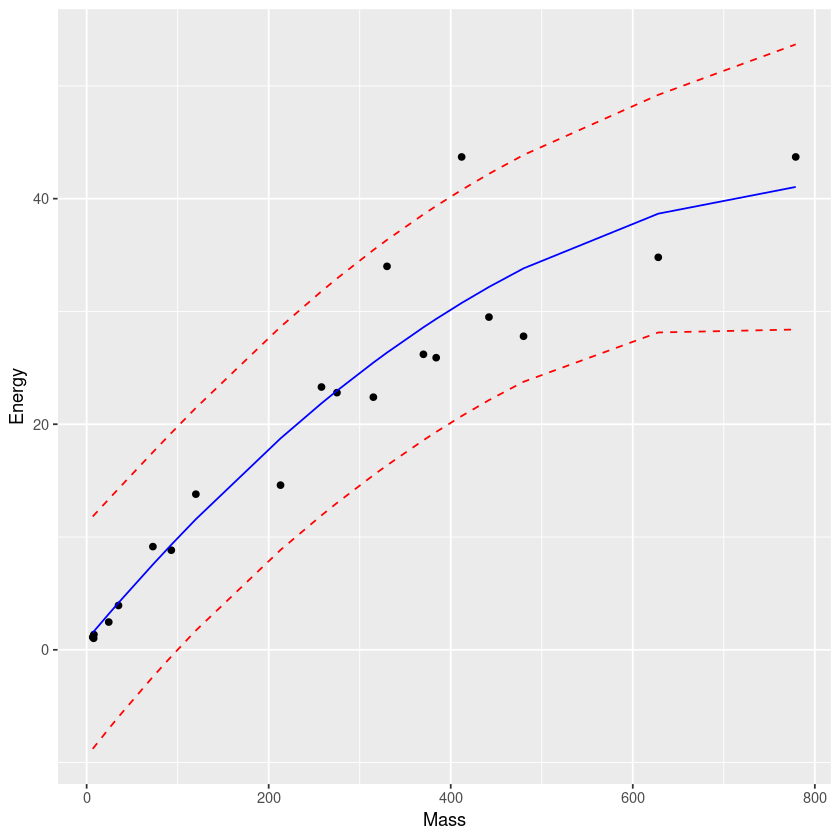

In [17]:
ggplot(df, aes(x=Mass, y=Energy)) +
    geom_point() +
    geom_line(aes(y=fit), color="blue") +
    geom_line(aes(y=lwr), color = "red", linetype = "dashed") +
    geom_line(aes(y=upr), color = "red", linetype = "dashed")

- The graph shows that most of the data points (except one) are inside the prediction interval, indicating that the model describes the observed data fairly well.

## Task 3

Now we use ANOVA(analysis of variance) model to investigate the dependence of Energy on Type

$H_0$: The average energy consumption does not differ between different types of flying animals.  
$H_A$: There is at least one group of flying animals whose mean energy consumption is statistically significantly different from the mean values of energy consumption in other groups.

In [18]:
anova_model <- aov(Energy ~ Type, data = df)
anova(anova_model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Type,2,1644.871,822.4356,6.72753,0.007042233
Residuals,17,2078.238,122.2493,NA,NA


As our p-value is less than 0.05, we can reject the null hypothesis that there are no statistically significant differences in energy consumption across the categories

The ANOVA test shows that the effect of ‘Type’ on ‘Energy’ is statistically significant (p < 0.05). This suggests that the energy consumption differs significantly between the different types of animals

The values of the regression coefficient estimates are obtained by fitting or using tapply

In [19]:
fitType = lm(Energy ~ Type, data = df)
summary(fitType)


Call:
lm(formula = Energy ~ Type, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.6933  -7.4525  -0.0417   5.9742  22.5467 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  31.050      5.528   5.617 3.08e-05 ***
Typenon-echolocating birds   -9.897      6.384  -1.550  0.13948    
Typeecholocating bats       -27.970      7.818  -3.578  0.00232 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.06 on 17 degrees of freedom
Multiple R-squared:  0.4418,	Adjusted R-squared:  0.3761 
F-statistic: 6.728 on 2 and 17 DF,  p-value: 0.007042


In [20]:
type_means <- tapply(df$Energy, df$Type, mean)
type_means <- round(type_means, 3)
type_means

non-echolocating bats non-echolocating birds      echolocating bats 
                31.050                 21.153                  3.080

These values can be interpreted as the regression coefficients in the context of this task. They show how much the average ‘Energy’ for each ‘Type’ differs from the baseline level. The results suggest that the type of animal has a significant impact on their energy consumption, with non-echolocating bats having the highest average energy consumption and echolocating bats having the lowest.

We will now evaluate the quality of our model. One common way to do this is by calculating the coefficient of determination

In [21]:
r_squared <- summary(fitType)$r.squared
r_squared <- round(r_squared, 3)
r_squared

[1] 0.442

The R-squared value for our model is approximately 0.442. This means that our model explains 44.2% of the variation in ‘Energy’ using the variable ‘Type’.

## Task 4

We will now create a regression model that includes both ‘Mass’ and ‘Type’ as predictors, as well as their interaction

In [22]:
interaction_model <- lm(Energy ~ Mass + I(Mass^2) + Type + Mass:Type + I(Mass^2):Type, data = df)
summary(interaction_model)


Call:
lm(formula = Energy ~ Mass + I(Mass^2) + Type + Mass:Type + I(Mass^2):Type, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9514 -1.9655 -0.0196  0.5064 12.8656 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)
(Intercept)                           2.419e+01  2.537e+01   0.953    0.361
Mass                                 -2.174e-02  1.175e-01  -0.185    0.857
I(Mass^2)                             6.041e-05  1.143e-04   0.529    0.608
Typenon-echolocating birds           -2.460e+01  2.569e+01  -0.957    0.359
Typeecholocating bats                -2.383e+01  5.077e+01  -0.469    0.648
Mass:Typenon-echolocating birds       1.443e-01  1.249e-01   1.155    0.272
Mass:Typeecholocating bats            1.312e-01  6.352e+00   0.021    0.984
I(Mass^2):Typenon-echolocating birds -1.739e-04  1.428e-04  -1.218    0.249
I(Mass^2):Typeecholocating bats      -2.576e-04  6.322e-02  -0.004    0.997

Residual standard error: 5.224 

The output of the model shows the estimated coefficients, standard errors, t-values, and p-values for each predictor in the model. The coefficients represent the change in the average ‘Energy’ for a one-unit increase in the predictor, holding all other predictors constant.

The p-values for most of the predictors are greater than 0.05, suggesting that these predictors are not statistically significant at the 0.05 level. However, the overall F-statistic for the model is significant (p < 0.05), indicating that the predictors as a group do have a significant effect on ‘Energy’.

The R-squared value for the model is 0.9194, indicating that approximately 91.94% of the variability in ‘Energy’ can be explained by ‘Mass’, ‘Type’, and their interaction. This is a relatively high R-squared value, suggesting that the model fits the data well.

Now that we have fitted our model, we will visualize it.  
In the following plots, the x-axis represents ‘Mass’, the y-axis represents the predicted ‘Energy’, and the different lines represent the different ‘Types’ of animals.

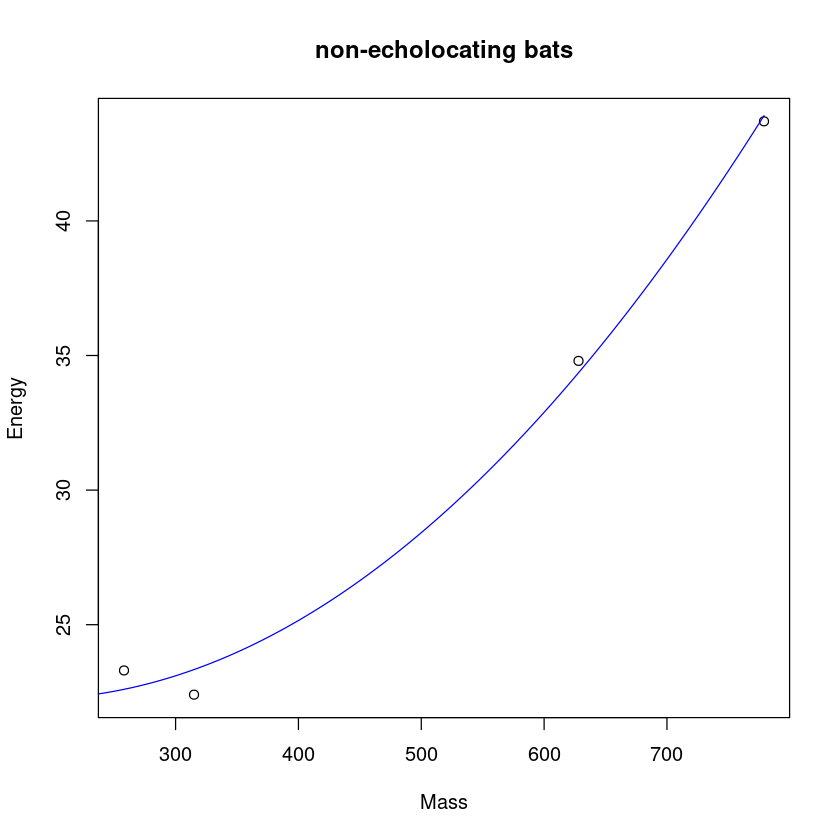

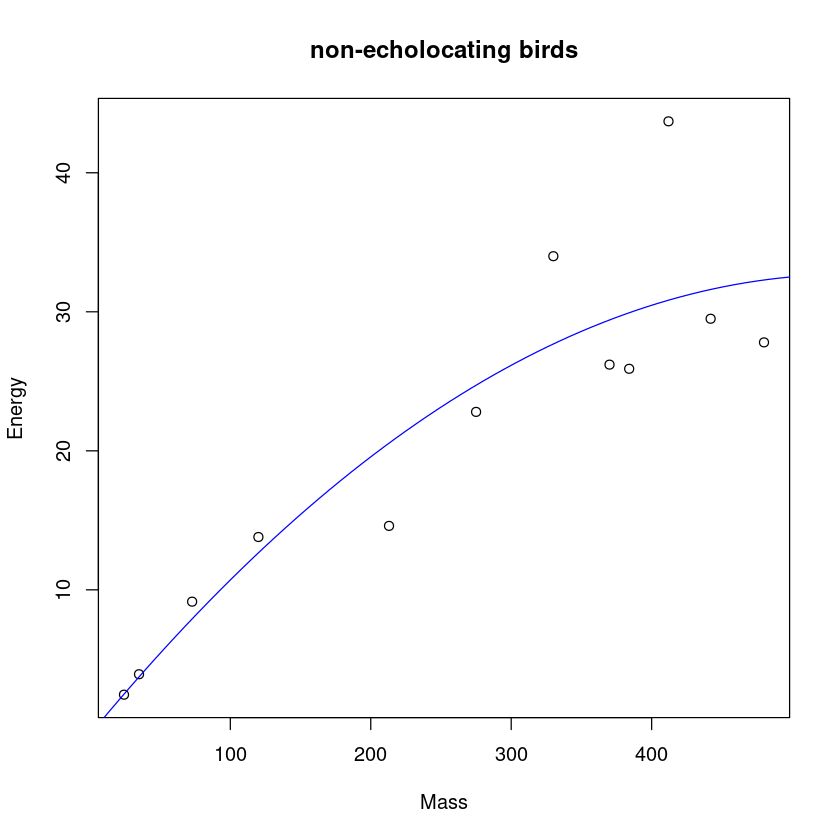

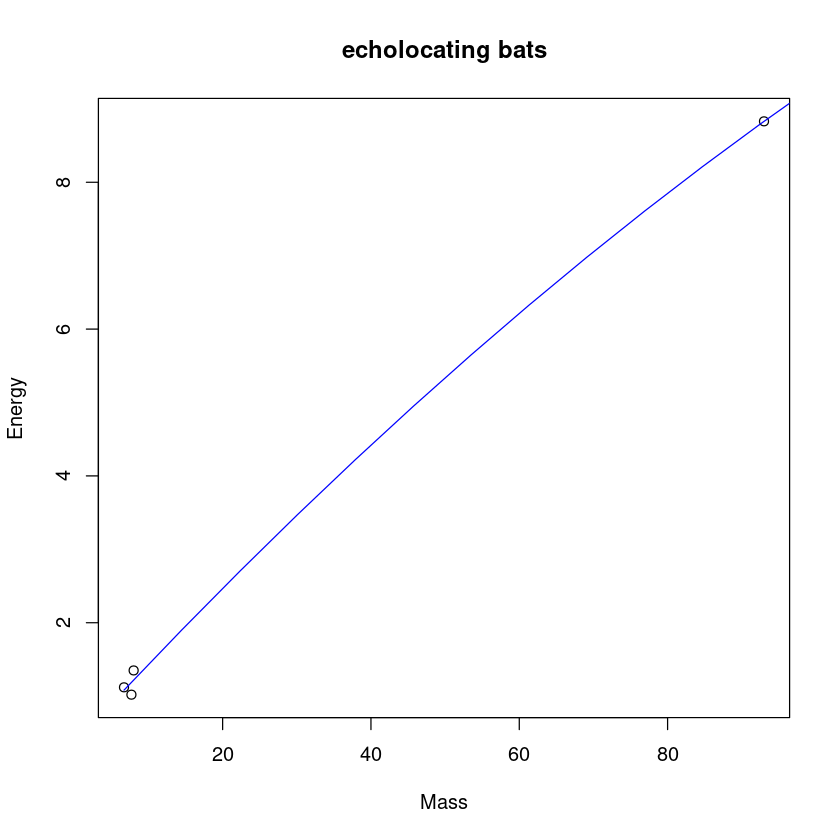

In [23]:
# Create new data
newdata <- data.frame(Mass = seq(min(df$Mass), max(df$Mass), length.out = 100),
                      Type = factor(rep(levels(df$Type), each = 100)))

# Predict Energy for new data
newdata$Energy <- predict(interaction_model, newdata)

# Create plot for each type
for(type in levels(df$Type)) {
  plot(Energy ~ Mass, data = df[df$Type == type, ], main = type)
  lines(Energy ~ Mass, data = newdata[newdata$Type == type, ], col = "blue")
}

As can be seen from the graphs, the model follows the layout of the real data quite closely, and also the lines for different types of animals differ in shape, suggesting that Type also affects the predicted value

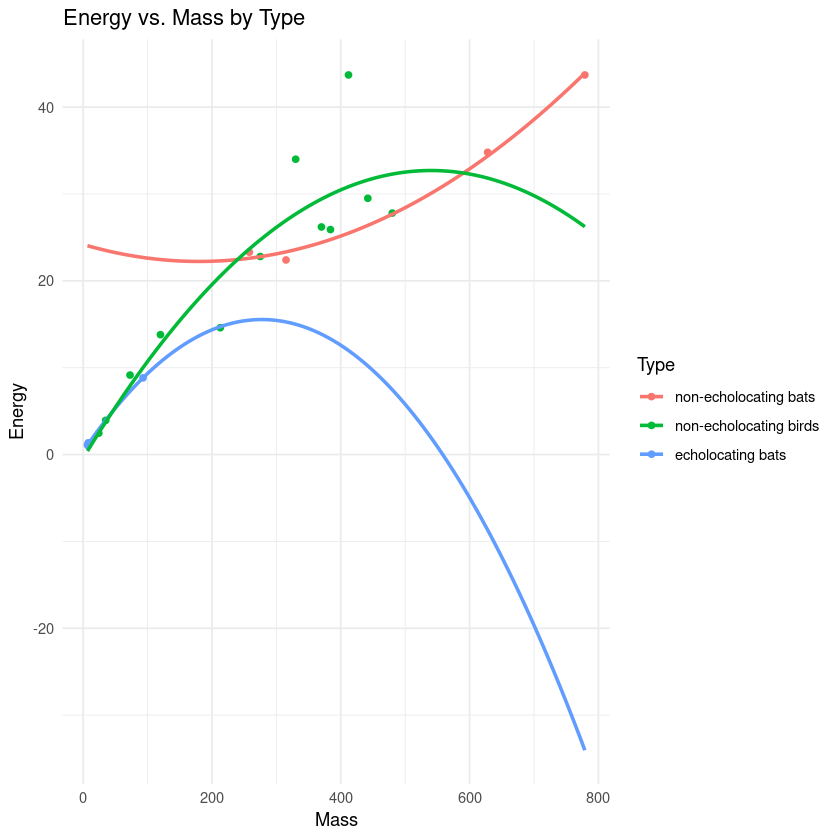

In [24]:
# overall graph
p <- ggplot(df, aes(x=Mass, y=Energy, color=Type)) +
  geom_point() + 
  geom_line(data=newdata, aes(x=Mass, y=Energy, color=Type), linewidth=1) +
  theme_minimal() +
  labs(title="Energy vs. Mass by Type", x="Mass", y="Energy")

print(p)

The overall graph shows especially how type affects predictions.

## Task 5

Now we will suggest a model that includes also 'Species' as a predictor

In [25]:
value_counts_species <- table(df$Species)
value_counts_species


            Columba livia         Corvus crytoeucos         Corvus ossifragus 
                        4                         1                         1 
           Eidolon helvum           Falco spaverius         Falco tinnunculus 
                        1                         1                         1 
  Hypsignathus monstrosus           Larus atricilla       Meliphaga virescens 
                        1                         1                         1 
  Melipsittacus undulatus      Phyllosomas hastatus Pipistrellus pipistrellus 
                        1                         1                         1 
         Plecotus auritus          Pteropus gouldii    Pteropus poliocephalus 
                        2                         1                         1 
         Sturnus vulgaris 
                        1 

We see that in our data, the 'Species' variable is a factor where we have only one observation for most of the levels. We can try to fit a model with 'Species' as a predictor, but we should be cautious about the results, as the model may be overfitted due to the small number of observations for each level of 'Species'.

In [26]:
species_model <- lm(Energy ~ Mass + I(Mass^2) + Type + Mass:Type + I(Mass^2):Type + Species, data = df)
summary(species_model)


Call:
lm(formula = Energy ~ Mass + I(Mass^2) + Type + Mass:Type + I(Mass^2):Type + 
    Species, data = df)

Residuals:
         1          2          3          4          5          6          7 
 3.226e-17  2.744e-16  1.098e-16 -1.739e-16 -4.070e-17  2.791e-16  2.687e-15 
         8          9         10         11         12         13         14 
 3.448e-16 -1.115e-15  1.219e-16  1.484e-16 -7.873e+00 -3.543e+00  1.002e+01 
        15         16         17         18         19         20 
 1.392e+00  3.543e-17 -4.612e-16  4.931e-13  1.101e-16 -4.928e-13 

Coefficients: (5 not defined because of singularities)
                                       Estimate Std. Error t value Pr(>|t|)
(Intercept)                          -5.387e+02  3.942e+04  -0.014    0.991
Mass                                  1.105e+00  6.271e+01   0.018    0.989
I(Mass^2)                            -3.050e-04  4.715e-03  -0.065    0.959
Typenon-echolocating birds            5.256e+02  3.946e+04   0.013    0.9

In suggested model, the p-values for all predictors are greater than 0.05, indicating that none of the predictors are statistically significant at the 0.05 level. Also F statistics' p-value is greater than 0.05, which means that the model as a whole is not statistically significant. We also see that the adjusted R-squared value is much lower than R-squared, which is a sign that the performance of the model is not good.

We can also try to create new variable 'Genus' that will take the first word from 'Species' and use it as a predictor. This way we will have more observations for each level of 'Genus' and the model may perform better.

In [27]:
df$Genus <- sapply(strsplit(as.character(df$Species), " "), function(x) x[1])
df$Genus <- as.factor(df$Genus)

df

,Species,Mass,Type,Energy,fit,lwr,upr,Genus
,<chr>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,Pteropus gouldii,779.0,non-echolocating bats,43.70,41.041032,28.3996471,53.68242,Pteropus
2,Pteropus poliocephalus,628.0,non-echolocating bats,34.80,38.670833,28.1366451,49.20502,Pteropus
3,Hypsignathus monstrosus,258.0,non-echolocating bats,23.30,21.855168,11.9208358,31.78950,Hypsignathus
4,Eidolon helvum,315.0,non-echolocating bats,22.40,25.464478,15.4806380,35.44832,Eidolon
5,Meliphaga virescens,24.3,non-echolocating birds,2.46,3.177563,-7.0009270,13.35605,Meliphaga
6,Melipsittacus undulatus,35.0,non-echolocating birds,3.93,4.168976,-5.9468204,14.28477,Melipsittacus
7,Sturnus vulgaris,72.8,non-echolocating birds,9.15,7.566663,-2.3905176,17.52384,Sturnus
8,Falco spaverius,120.0,non-echolocating birds,13.80,11.580177,1.7120379,21.44832,Falco
9,Falco tinnunculus,213.0,non-echolocating birds,14.60,18.743606,8.8533352,28.63388,Falco


In [28]:
species_model <- lm(Energy ~ Genus, data = df)
summary(species_model)


Call:
lm(formula = Energy ~ Genus, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3750 -0.2238  0.0000  0.2238 10.4250 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          33.275      2.868  11.602 7.97e-06 ***
GenusCorvus          -7.975      4.968  -1.605 0.152446    
GenusEidolon        -10.875      6.413  -1.696 0.133761    
GenusFalco          -19.075      4.968  -3.840 0.006376 ** 
GenusHypsignathus    -9.975      6.413  -1.555 0.163809    
GenusLarus           -7.075      6.413  -1.103 0.306423    
GenusMeliphaga      -30.815      6.413  -4.805 0.001955 ** 
GenusMelipsittacus  -29.345      6.413  -4.576 0.002557 ** 
GenusPhyllosomas    -24.445      6.413  -3.812 0.006614 ** 
GenusPipistrellus   -32.155      6.413  -5.014 0.001541 ** 
GenusPlecotus       -32.090      4.968  -6.460 0.000347 ***
GenusPteropus         5.975      4.968   1.203 0.268163    
GenusSturnus        -24.125      6.413  -3.762 0.007059 ** 
---


We see that our newly created variable 'Genus' gives us a better model. There are quite a lot of predictors that are statistically significant at the 0.05 level, and the overall F-statistic is also significant. The R-squared value is 0.93, which means that the model explains almost all of the variability in 'Energy'. The adjusted R-squared though is lower. This is because the adjusted R-squared penalizes the model for having more predictors, and in this case, we have more predictors than for example in the model with only 'Mass' and 'Type'.

Now with the help of function ```step``` we can try to find the best combination of predictors. The function will try to add or remove predictors from the model to find the best combination. 

In [29]:
step(lm(Energy~-1, data=df), scope = list(lower = ~-1, upper = ~Mass * Genus * Type * I(Mass^2)), test = "F")

Start:  AIC=126.81
Energy ~ -1

            Df Sum of Sq     RSS     AIC  F value    Pr(>F)    
+ Mass       1   10678.2   664.0  72.050 305.5704 3.626e-13 ***
+ Genus     13   11111.8   230.3  74.875  25.9774 0.0001185 ***
+ I(Mass^2)  1    8343.2  2999.0 102.206  52.8586 6.729e-07 ***
+ Type       2    5407.5  5934.6 117.857   8.2006 0.0029396 ** 
<none>                   11342.2 126.811                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Step:  AIC=72.05
Energy ~ Mass - 1

            Df Sum of Sq     RSS     AIC  F value    Pr(>F)    
+ I(Mass^2)  1     313.1   350.8  61.292  16.0641  0.000825 ***
+ Type       2     205.0   459.0  68.666   3.7955  0.043374 *  
<none>                     664.0  72.050                       
+ Genus     13     469.8   194.1  73.456   1.1170  0.473628    
- Mass       1   10678.2 11342.2 126.811 305.5704 3.626e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Step:  AIC=61.29
Energy ~ Ma


Call:
lm(formula = Energy ~ Mass + I(Mass^2) - 1, data = df)

Coefficients:
      Mass   I(Mass^2)  
 1.006e-01  -6.199e-05  


This gave us the best model with 'Mass', 'Mass^2' and without intercept. Let's see how this model performs.

In [30]:
model = lm(Energy ~ Mass + I(Mass^2) -1, data = df)
summary(model)


Call:
lm(formula = Energy ~ Mass + I(Mass^2) - 1, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2090 -2.9284  0.1504  1.6409 12.7723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
Mass       1.006e-01  8.631e-03  11.656 8.05e-10 ***
I(Mass^2) -6.199e-05  1.547e-05  -4.008 0.000825 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.415 on 18 degrees of freedom
Multiple R-squared:  0.9691,	Adjusted R-squared:  0.9656 
F-statistic:   282 on 2 and 18 DF,  p-value: 2.593e-14


In our final model we have two regressors that are both statistically significant at the 0.05 level. The overall F-statistic is also significant. The R-squared value is 0.97, which means that the model explains 97% of the variability in 'Energy'. Adjusted R-squared is also high, which is a good sign. The model seems to perform well.

Also we can use the function ```anova``` to compare the models with and without intercept (as our best models). The function compares two models and returns the p-value for the F-statistic.

$H_0$: The reduced model is statistically significantly better than the full model.\
$H_A$: The full model is statistically significantly better than the reduced model.

In [34]:
modelAll <- lm(Energy ~ Mass + I(Mass^2) + Type + Mass:Type + I(Mass^2):Type + Genus, data =df)

In [39]:
anova_test = anova(model, modelAll)
anova_test

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,18,350.8456,NA,NA,NA,NA
2,3,179.7984,15,171.0472,0.1902656,0.9888252


Since the p-value is much more than 0.05, we cannot reject the null hypothesis that the reduced model is better than the full model

## Task 6

In previous task we have found the best model that explains the variability in 'Energy'. For this model we will now verify the assumptions of linear regression.\
At first we will check multicollinearity of the predictors.

In [31]:
cor(model.matrix(model))

,Mass,I(Mass^2)
Mass,1.0000000,0.9361961
I(Mass^2),0.9361961,1.0000000


As expected, 'Mass' and 'Mass^2' are highly correlated, which is not surprising, as 'Mass^2' is derived from 'Mass'.

Also we can try VIF test.

In [34]:
library(car)
round(vif(model), 2)

Warning message:
"package 'car' was built under R version 4.3.3"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.3.3"
Warning message in vif.default(model):
"No intercept: vifs may not be sensible."


Mass I(Mass^2) 
     8.82      8.82

As in the previous result, we see that predictors 'Mass' and 'Mass^2' have high VIF values, which means that they can be described by each other.

Also we can analyze the residuals of the model. We will check if they are normally distributed, if they have constant variance and if they are independent.

We can test homoscedasticity of the residuals using Breusch-Pagan test.

$H_0$: The residuals are homoscedastic\
$H_A$: The residuals are heteroscedastic

In [35]:
library(lmtest)

bptest(model)

Warning message:
"package 'lmtest' was built under R version 4.3.3"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 4.3.3"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric





	studentized Breusch-Pagan test

data:  model
BP = 1.0201, df = 1, p-value = 0.3125


As the value is higher than 0.05, we cannot reject the null hypothesis of homoscedasticity.

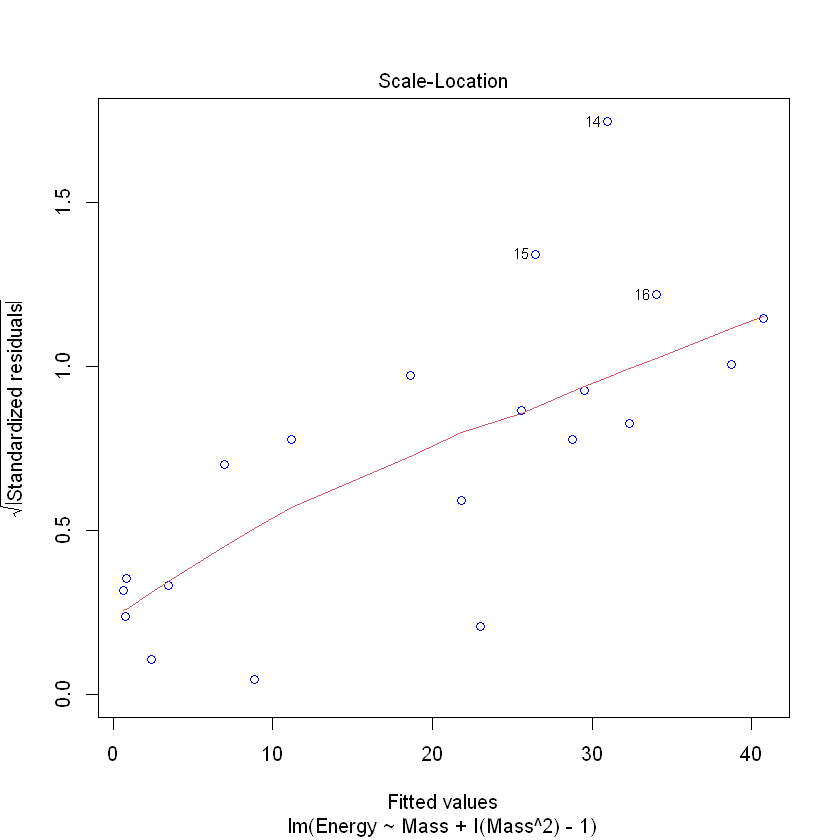

In [37]:
plot(model, which=3, col=c("blue"))

In [36]:
shapiro.test(residuals(model))


	Shapiro-Wilk normality test

data:  residuals(model)
W = 0.88708, p-value = 0.02378


Shapiro test shows that the residuals are normally distributed. As the p-value is not more than 0.05, we can reject the null hypothesis of normality.

$H_0$: The residuals are normally distributed\
$H_A$: The residuals are not normally distributed

As we rejected the normality of the residuals, we cannot use ```ols_test_correlation``` to test the independence of the residuals. Instead, we can use Durbin-Watson test.

In [35]:
durbinWatsonTest(model)

 lag Autocorrelation D-W Statistic p-value
   1      0.02269416      1.929724   0.698
 Alternative hypothesis: rho != 0

As the test statistic is between 1.5 and 2.5, there is no strong evidence of autocorrelation.

- In our analysis, we used linear regression, ANOVA and F-tests, which are based on the assumption that the distribution of residuals is normal. If this assumption is violated, the results may be unreliable. In such cases, data transformation to achieve normality, alternative approaches such as non-parametric tests or bootstrap methods can be applied to avoid misinterpretation of the results.